## **EDA**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# warning message 무시
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [30]:
# 데이터 불러오기
# Top Spotify songs from 2010-2019
# 'utf-8' codec can't decode byte 0xe9 in position 5115: invalid continuation byte 에러 발생
# encoding='latin-1'로 하니 에러 발생 x

spotify = pd.read_csv('./top10s.csv', encoding='latin-1')

In [24]:
# 다행히 깨지는 데이터 없음

spotify

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [34]:
# 'Unnamed:0'을 'ID'로 열 이름 변경
# 상위 5개 데이터 확인

spotify.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

spotify.head(5)

,ID,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [48]:
# 각 Column의 데이터 타입 확인하기

spotify.dtypes

ID            int64
title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

In [47]:
# 데이터 전체 정보를 얻는 함수 : .describe()
# 수치형 데이터에 대한 요약안을 제공!

spotify.describe()

,ID,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


[]

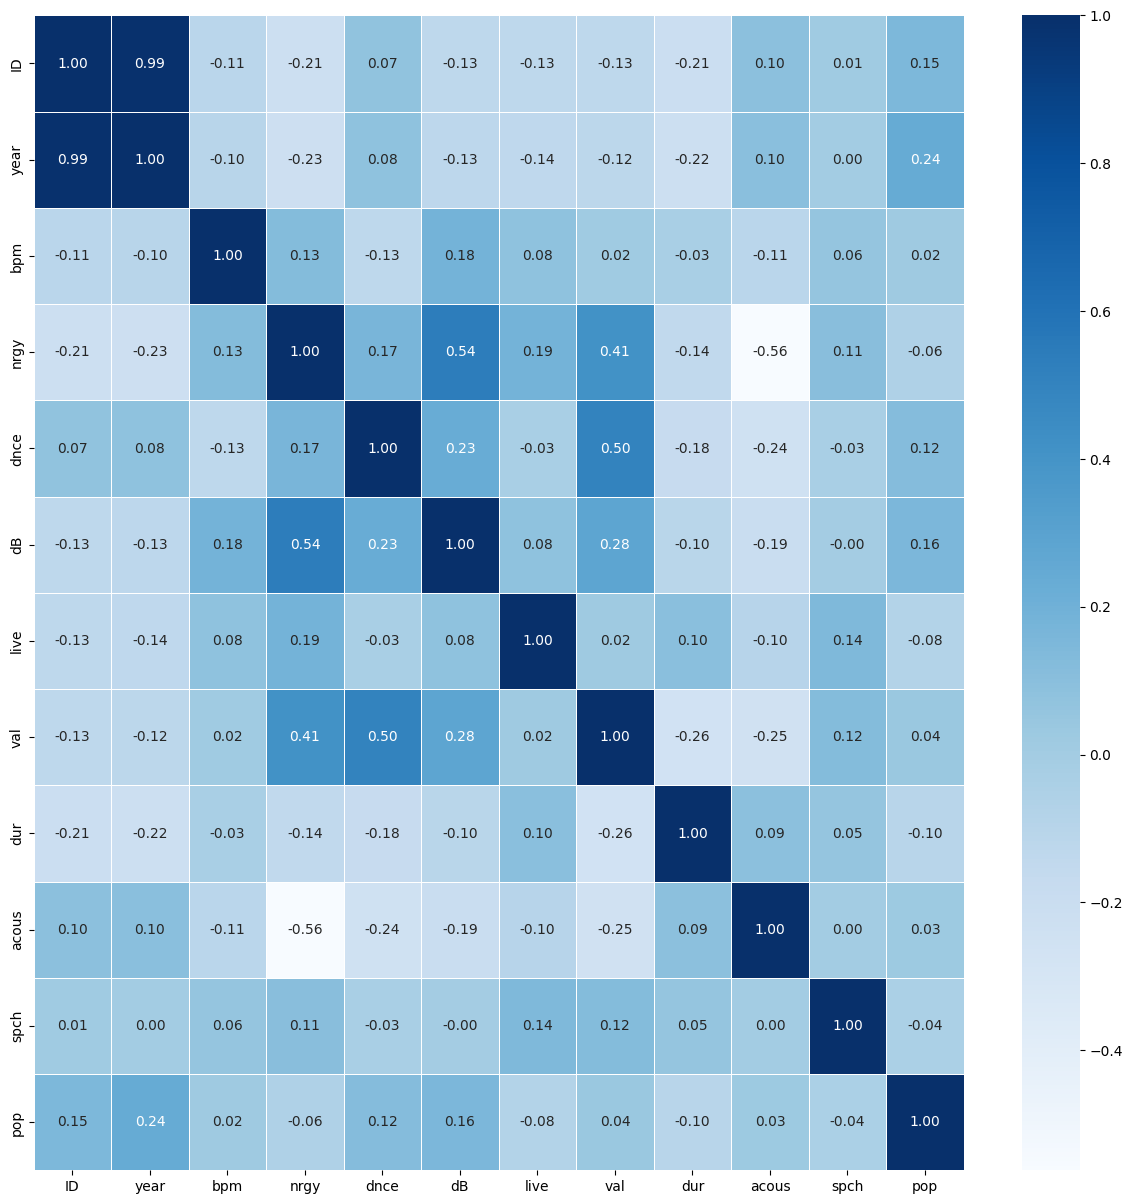

In [43]:
# 히트맵을 통해 상관계수 확인

plt.figure(figsize=(15,15))
sns.heatmap(data = spotify.corr(numeric_only=True), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.plot()

In [46]:
# 결측치 확인

spotify.isnull().sum()

ID           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

## **Top 10 genre**

In [27]:
# 각 장르별 노래 개수 내림차순으로 정렬

top10 = spotify.groupby(['top genre'])['title'].count().sort_values(ascending=False)
top10.head(10)

top genre
dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: title, dtype: int64

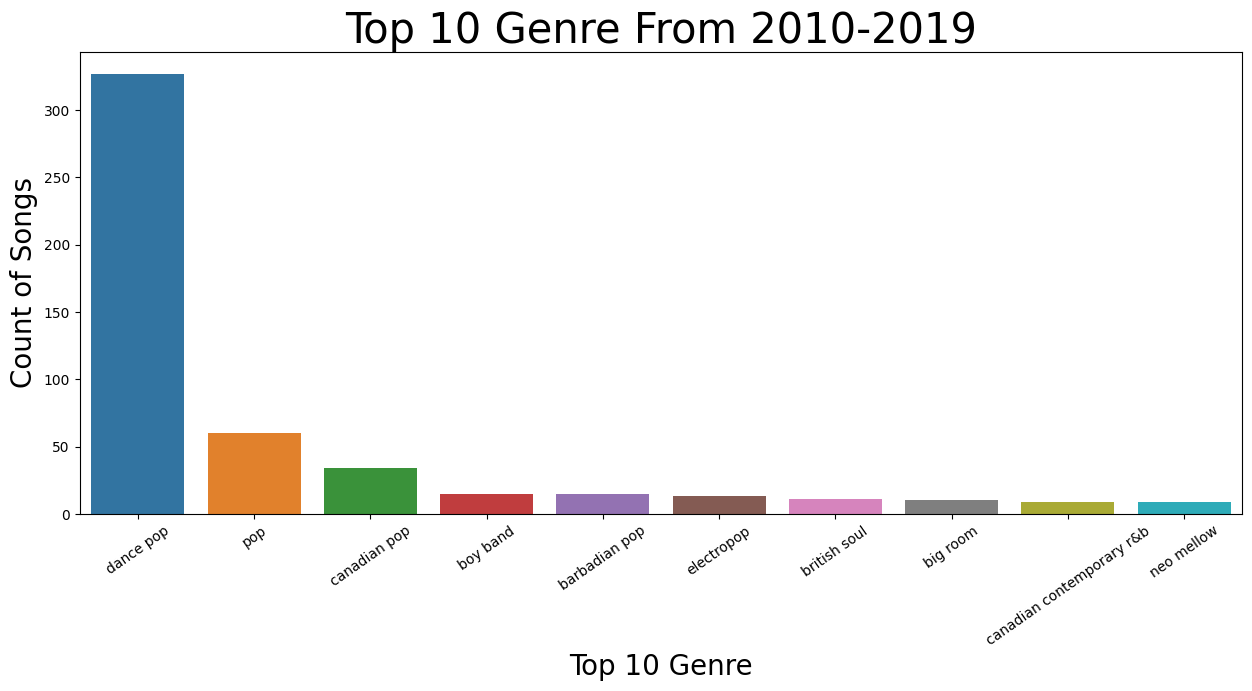

In [96]:
plt.figure(figsize=(15,6))
sns.barplot(x=top10.head(10).index, y=top10.head(10))
plt.xticks(rotation=35, fontsize=10)
plt.title('Top 10 Genre From 2010-2019',fontsize=30)
plt.xlabel("Top 10 Genre", fontsize=20)
plt.ylabel("Count of Songs", fontsize=20)
plt.show()

### **결론**
- 2010 ~ 2019년 사이 dance pop 장르의 노래가 가장 인기가 많다
- dance pop 장르의 노래들은 유행을 잘 타지 않는 노래라는 것을 유추해볼 수 있다.

## **Average of Songs BPM**

In [83]:
Most_BPM = spotify.groupby(['bpm'])['title'].count().sort_values(ascending=False)

Most_BPM.head(10)

bpm
120    47
100    33
128    29
130    27
125    21
126    20
122    16
95     14
127    12
124    12
Name: title, dtype: int64

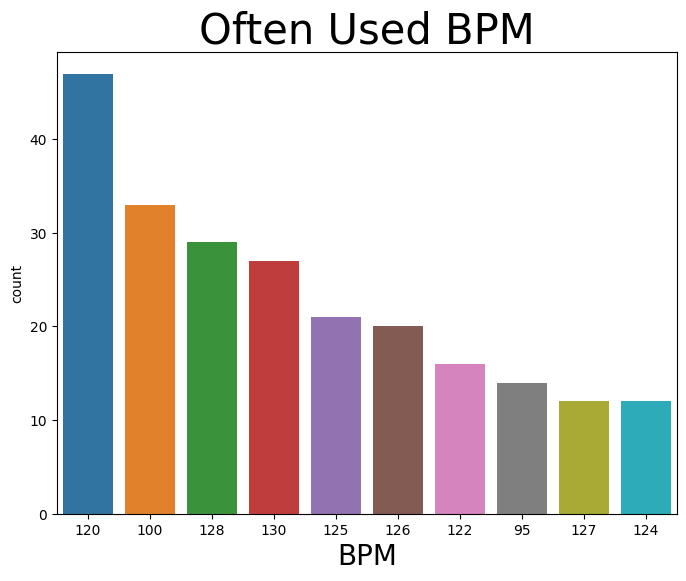

In [97]:
# 많이 사용된 BPM 개수

plt.figure(figsize=(8,6))
sns.countplot(x='bpm', data=spotify, order=Most_BPM.head(10).index)
plt.xlabel('BPM', fontsize=20)
plt.title('Often Used BPM', fontsize=30)
plt.show()

In [87]:
# 연도별 bpm 평균

spotify[['year', 'bpm']].groupby(['year']).mean()

,bpm
year,
2010,122.058824
2011,119.075472
2012,121.085714
2013,121.676056
2014,123.000000
2015,119.768421
2016,114.325000
2017,116.800000
2018,114.593750


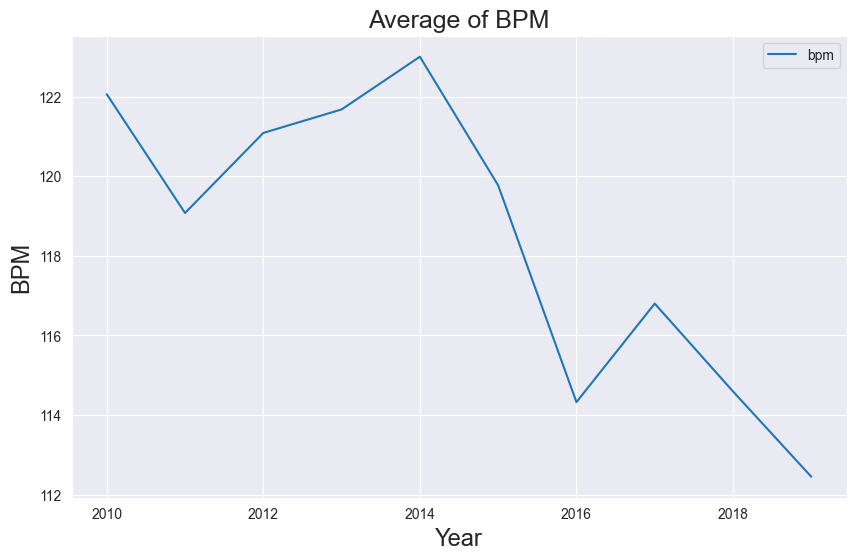

In [12]:
# 연도별 BPM 라인 그래프

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.lineplot(data=spotify[['year', 'bpm']].groupby(['year']).mean())
plt.xlabel('Year', fontsize=17)
plt.ylabel('BPM', fontsize=17)
plt.title('Average of BPM', fontsize=18)
plt.show()

### **결론**
- 그래프를 보니 시간이 지날수록 평균 bpm이 점점 낮아지고 있다.
- 시간이 지날수록 느린 템포의 노래들을 선호하고 있다.

## **Average of Songs Duration**

In [18]:
# 연도별 노래 길이 평균

spotify[['year', 'dur']].groupby(['year']).mean()

,dur
year,
2010,229.803922
2011,242.566038
2012,224.400000
2013,234.492958
2014,224.155172
2015,223.368421
2016,220.225000
2017,222.169231
2018,217.187500


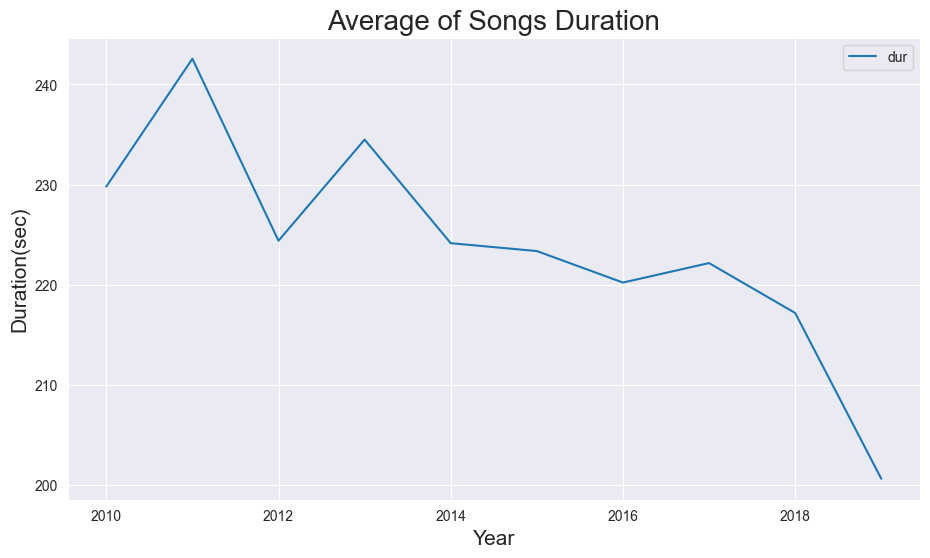

In [25]:
plt.figure(figsize=(11,6))
sns.set_style('darkgrid')
sns.lineplot(spotify[['year', 'dur']].groupby(['year']).mean())
plt.xlabel('Year', fontsize=15)
plt.ylabel('Duration(sec)', fontsize=15)
plt.title('Average of Songs Duration', fontsize=20)
plt.show()

### **결론**
- 시간이 지날수록 노래의 길이가 짧아지고 있다.
- YouTube shorts, TicTok 등 숏폼들이 트렌드이고 그것에 맞춰 노래 길이도 짧아진 것 같다고 유추해볼 수 있을 것 같다.